<a href="https://colab.research.google.com/github/Aandhikads/Aandhikads/blob/main/vehicle_model_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

2021-10-12 18:02:43.178249: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
data_dir = '../input/vehicle-images-dataset/vehicle_images/vehicle_images'

In [ ]:
data0=pd.read_csv('../input/vehicle-images-dataset/vehcle_img_data.csv')
data0

,Image_Path,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity
0,/vehicle_images/1633889154186_Toyota Hilux 200...,Toyota,Hilux,Hilux,2006,Used,Manual,SUV / 4x4,Diesel,"2,500 cc"
1,/vehicle_images/1633889154395_Land Rover Freel...,Land Rover,Freelander,1999,1999,Used,Manual,SUV / 4x4,Diesel,"1,990 cc"
2,/vehicle_images/1633889154545_Nissan Leaf G Gr...,Nissan,Leaf,G Grade,2014,Used,Automatic,Hatchback,Electric,70 cc
3,/vehicle_images/1633889154697_Mercedes Benz C2...,Mercedes Benz,C200,C-Cabriolet AMG Line,2016,Used,Automatic,Convertible,Petrol,"2,000 cc"
4,/vehicle_images/1633889154870_Toyota Vitz 2018...,Toyota,Vitz,2018,2018,Used,Automatic,Hatchback,Petrol,"1,000 cc"
...,...,...,...,...,...,...,...,...,...,...
8181,/vehicle_images/1633902178902_Toyota Tank Gs C...,Toyota,Tank,Gs Custom,2017,Used,Automatic,MPV,Petrol,"1,000 cc"
8182,/vehicle_images/1633902179189_Suzuki Swift 200...,Suzuki,Swift,Suzuki,2003,Used,Automatic,Hatchback,Petrol,"1,320 cc"
8183,/vehicle_images/1633902179392_Land Rover Range...,Land Rover,Range Rover Sport,Diesel Com. Reg.2019,2018,Used,Automatic,SUV / 4x4,Diesel,"2,000 cc"
8184,/vehicle_images/1633902179722_Nissan Sunny FB1...,Nissan,Sunny,FB14,1998,Used,Manual,Saloon,Petrol,"1,500 cc"


In [ ]:
Name=data0['Model'].unique().tolist()
print(Name[0:10])
print(len(Name))

['Hilux', 'Freelander', 'Leaf', 'C200', 'Vitz', 'Starlet', 'Aqua', 'Outlander', 'Axio', 'Grand Vitara']
438


In [ ]:
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [ ]:
data1=data0[['Image_Path','Model']]
data1['Model']=data1['Model'].map(normal_mapping)
data1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Image_Path,Model
0,/vehicle_images/1633889154186_Toyota Hilux 200...,0
1,/vehicle_images/1633889154395_Land Rover Freel...,1
2,/vehicle_images/1633889154545_Nissan Leaf G Gr...,2
3,/vehicle_images/1633889154697_Mercedes Benz C2...,3
4,/vehicle_images/1633889154870_Toyota Vitz 2018...,4
...,...,...
8181,/vehicle_images/1633902178902_Toyota Tank Gs C...,247
8182,/vehicle_images/1633902179189_Suzuki Swift 200...,81
8183,/vehicle_images/1633902179392_Land Rover Range...,178
8184,/vehicle_images/1633902179722_Nissan Sunny FB1...,11


(120, 160, 3)
(36, 48, 3)


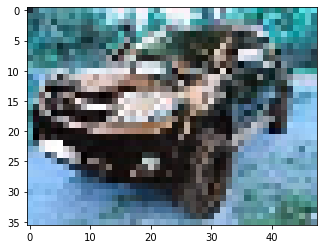

In [ ]:
image=cv2.imread('../input/vehicle-images-dataset/vehicle_images/vehicle_images/1633889154186_Toyota Hilux 2006 for sale.jpg')
print(image.shape)
image2=cv2.resize(image,dsize=(48,36),interpolation=cv2.INTER_CUBIC)
print(image2.shape)
plt.imshow(image2)

In [ ]:
dataX=[]
dataY0=[]
for i in range(len(data1)):
    path=data1.loc[i,'Image_Path']
    model=data1.loc[i,'Model']
    image=cv2.imread('../input/vehicle-images-dataset/vehicle_images'+path)
    image2=cv2.resize(image,dsize=(48,36),interpolation=cv2.INTER_CUBIC)
    dataX+=[image2]
    dataY0+=[model]

In [ ]:
dataX=np.array(dataX)
dataY0=np.array(dataY0)

In [ ]:
m=len(dataX)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

In [ ]:
trainX=dataX[M[0:(m//4)*3]]
trainY0=dataY0[M[0:(m//4)*3]]
testX=dataX[M[(m//4)*3:]]
testY0=dataY0[M[(m//4)*3:]]

In [ ]:
labels1=to_categorical(trainY0)
trainY=np.array(labels1)

In [ ]:
trainx,testx,trainy,testy=train_test_split(trainX,trainY,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4910, 36, 48, 3)
(1228, 36, 48, 3)
(4910, 438)
(1228, 438)


datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(36,48,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

2021-10-12 18:03:17.771643: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-12 18:03:17.774899: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-12 18:03:17.821161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-12 18:03:17.821902: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-12 18:03:17.821962: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-12 18:03:17.846115: I tensorflow/stream_executor/platform/def

74842112/74836368 [==============================] - 1s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(len(Name), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(trainx,trainy,batch_size=32,validation_data=(testx,testy),epochs=200)
#his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=2)

2021-10-12 18:03:26.059030: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-12 18:03:26.069691: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000200000 Hz


Epoch 1/200


2021-10-12 18:03:35.243908: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-12 18:03:36.013705: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-12 18:03:36.037026: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


154/154 [==============================] - 25s 57ms/step - loss: 5.5551 - accuracy: 0.0277 - val_loss: 4.9887 - val_accuracy: 0.0464
Epoch 2/200
154/154 [==============================] - 5s 33ms/step - loss: 4.7742 - accuracy: 0.0595 - val_loss: 4.9591 - val_accuracy: 0.0562
Epoch 3/200
154/154 [==============================] - 5s 31ms/step - loss: 4.6411 - accuracy: 0.0670 - val_loss: 4.9376 - val_accuracy: 0.0643
Epoch 4/200
154/154 [==============================] - 5s 33ms/step - loss: 4.5062 - accuracy: 0.0812 - val_loss: 4.9195 - val_accuracy: 0.0611
Epoch 5/200
154/154 [==============================] - 5s 31ms/step - loss: 4.3505 - accuracy: 0.0971 - val_loss: 4.9333 - val_accuracy: 0.0651
Epoch 6/200
154/154 [==============================] - 5s 35ms/step - loss: 4.2360 - accuracy: 0.1021 - val_loss: 5.1522 - val_accuracy: 0.0651
Epoch 7/200
154/154 [==============================] - 5s 31ms/step - loss: 4.0780 - accuracy: 0.1226 - val_loss: 5.0547 - val_accuracy: 0.0668
Epo

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.04      0.06      0.05        18
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        10
           3       0.08      0.12      0.10         8
           4       0.07      0.08      0.08        36
           5       0.00      0.00      0.00         1
           6       0.03      0.03      0.03        35
           7       0.00      0.00      0.00         7
           8       0.04      0.07      0.05        28
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         9
          11       0.10      0.09      0.09        43
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00         8
          16       0.11      0.11      0.11        45
          17       0.04      0.04      0.04        26
          18       0.20    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


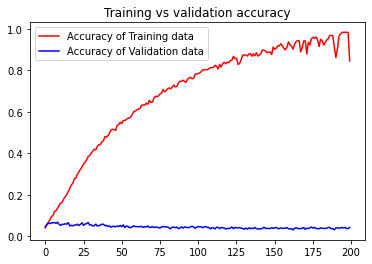

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

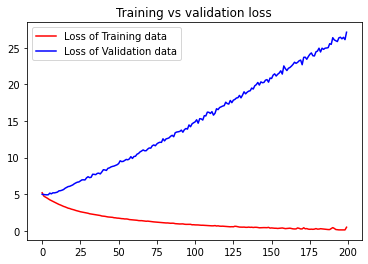

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
pred2=model.predict(testX)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(pd.Series(PRED).value_counts())

(2048, 438)
16     97
21     84
41     77
45     73
8      70
       ..
112     1
27      1
172     1
92      1
436     1
Length: 210, dtype: int64


In [ ]:
ANS=testY0
print(pd.Series(ANS).value_counts())
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

4      80
8      76
19     74
16     71
30     57
       ..
252     1
251     1
248     1
245     1
435     1
Length: 276, dtype: int64
0.03662109375


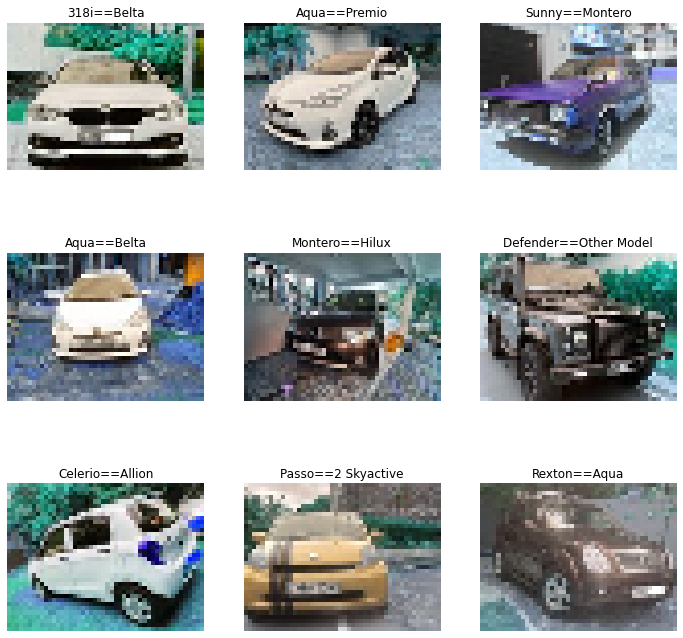

In [ ]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
for i in range(9):
    r=i//3
    c=i%3
    img1 = testX[i]
    ax=axs[r][c].axis("off")
    actual=reverse_mapping[testY0[i]]
    predict=reverse_mapping[PRED[i]]    
    ax=axs[r][c].set_title(actual+'=='+predict)
    ax=axs[r][c].imshow(img1)
plt.show()